Contents:
* Data preparation and cleaning

* Exploratory data analysis and visualization

* Exploring parameters like country, age, gender, education level, employment level, etc

* Exploring Trends

* Drawing conclusions

In [1]:
#Importing Liabraries
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import os
pd.set_option("max_rows",100)
pd.set_option("max_columns",None)

In [2]:
os.chdir(r"C:\Users\Dan Masibo\Documents\Python Projects\survey_results_public.csv")

In [3]:
df=pd.read_csv("survey_results_public.csv")
display(df.head(4))

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [4]:
df.shape

(64461, 61)

The dataset contains over 64,000 responses to 60 questions (although many questions are optional)

In [5]:
df.columns.to_list()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

It appears that shortcodes for questions have been used as column names.



We can refer to the schema file to see the full text of each question.

In [6]:
survey_results_schema=pd.read_csv("survey_results_schema.csv")
survey_results_schema.head(100)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience, and preferences
* Employment-related information, preferences, and opinions

In [7]:
#Let's select a subset of columns with the relevant data for our analysis.
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [8]:
len(selected_columns)

20

In [9]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


There seems to be a problem with the age column, as minimum value is 1 and the maximum is 279.
A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses

In [10]:
df.drop(df[df.Age<10].index, inplace=True)
df.drop(df[df.Age>100].index, inplace=True)

In [11]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64451.000000,45436.000000,3.482100e+04,3.475100e+04,41147.000000
mean,32554.672511,30.834294,3.190922e+242,1.037383e+05,40.782153
std,18967.423816,9.506982,inf,2.268492e+05,17.816102
min,1.000000,10.000000,0.000000e+00,0.000000e+00,1.000000
25%,16117.500000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32233.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49141.500000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,99.000000,1.111111e+247,2.000000e+06,475.000000


The same holds for WorkWeekHrs . Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day)

In [12]:
 df.drop(df[df.WorkWeekHrs>140].index, inplace=True)

In [13]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64306.000000,45319.000000,3.469100e+04,3.462200e+04,41002.000000
mean,32553.458231,30.832322,3.202880e+242,1.037241e+05,40.024395
std,18970.567585,9.505965,inf,2.266702e+05,10.630010
min,1.000000,10.000000,0.000000e+00,0.000000e+00,1.000000
25%,16115.250000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32230.500000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49147.750000,35.000000,1.250000e+05,9.500000e+04,43.000000
max,65639.000000,99.000000,1.111111e+247,2.000000e+06,140.000000


The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [14]:
df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [15]:
df.where(~(df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [16]:
df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame

In [17]:
df.sample(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
58007,59147.0,I am a developer by profession,No,31.0,12,Yearly,60000.0,64859.0,Germany,European Euro,EUR,Elasticsearch;MariaDB;PostgreSQL;Redis,Elasticsearch;MariaDB;MySQL;PostgreSQL;Redis,"Database administrator;Developer, back-end;Dev...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,Specific department or team I’d be working on;...,Slightly satisfied,"I’m not actively looking, but I am open to new...",C;C++;HTML/CSS;JavaScript;PHP;Python;SQL,C;HTML/CSS;JavaScript;PHP;Python;SQL,NaN,Cordova,Github;Gitlab,Github;Gitlab;Slack,No,Extremely important,Somewhat important,Curious about other opportunities;Wanting to w...,"Read company media, such as employee blogs or ...",Once a year,No,Onboarding? What onboarding?,Yes,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,Linux-based,2 to 9 employees,Docker;Linux,Docker;Linux,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,A few times per month or weekly,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",jQuery;Vue.js,jQuery,Just as welcome now as I felt last year,30.0,20,15
47098,48085.0,I am a developer by profession,Yes,49.0,12,Monthly,180000.0,37896.0,The former Yugoslav Republic of Macedonia,Macedonian denar,MKD,NaN,Microsoft SQL Server,"Developer, full-stack",Some college/university study without earning ...,Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,"I’m not actively looking, but I am open to new...",NaN,C#;HTML/CSS;JavaScript;SQL;TypeScript,NaN,.NET;.NET Core,NaN,Confluence;Jira;Github;Microsoft Teams,Yes,Somewhat important,Somewhat important,Trouble with my teammates;Trouble with my dire...,"Read company media, such as employee blogs or ...",Once every few years,Not sure,Yes,No,Occasionally: 1-2 days per quarter but less th...,Start a free trial;Ask developers I know/work ...,Annoyed,Stack Overflow (public Q&A for anyone who codes),Call a coworker or friend;Visit Stack Overflow...,Windows,100 to 499 employees,Microsoft Azure,Docker;Windows,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,A few times per month or weekly,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",Angular.js;Vue.js,ASP.NET;ASP.NET Core,Somewhat less welcome now than last year,40.0,35,30
654,656.0,I am a developer by profession,Yes,30.0,13,Yearly,75000.0,76237.0,Switzerland,Swiss franc,CHF,NaN,NaN,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed part-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Very dissatisfied,I am actively looking for a job,HTML/CSS;JavaScript;Python;TypeScript,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL,NaN,Node.js,Github;Gitlab,"Confluence;Github;Gitlab;Google Suite (Docs, M...",No,Extremely important,Somewhat important,Having a bad day (or week

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64306 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    63995 non-null  float64
 1   MainBranch                    63700 non-null  object 
 2   Hobbyist                      63950 non-null  object 
 3   Age                           45068 non-null  float64
 4   Age1stCode                    57440 non-null  object 
 5   CompFreq                      39721 non-null  object 
 6   CompTotal                     34522 non-null  float64
 7   ConvertedComp                 34453 non-null  float64
 8   Country                       63606 non-null  object 
 9   CurrencyDesc                  45112 non-null  object 
 10  CurrencySymbol                45112 non-null  object 
 11  DatabaseDesireNextYear        43732 non-null  object 
 12  DatabaseWorkedWith            49155 non-null  object 
 13  D

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values.

To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value.
The non-numeric are converted to NaN.

In [19]:
df['Age1stCode']=pd.to_numeric(df.Age1stCode, errors='coerce')
df['YearsCode']=pd.to_numeric(df.YearsCode, errors='coerce')
df['YearsCodePro']=pd.to_numeric(df.YearsCodePro, errors='coerce')

In [20]:
df.describe()

,Respondent,Age,Age1stCode,CompTotal,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,63995.000000,45068.000000,57027.000000,3.452200e+04,3.445300e+04,40813.000000,56339.000000,43794.000000
mean,32555.453660,30.842926,15.485068,3.218560e+242,1.038089e+05,40.026995,12.791583,8.882176
std,18971.872235,9.501008,5.113927,inf,2.270709e+05,10.626085,9.498470,7.768074
min,1.000000,10.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,16111.500000,24.000000,12.000000,2.000000e+04,2.464800e+04,40.000000,6.000000,3.000000
50%,32244.000000,29.000000,15.000000,6.300000e+04,5.404900e+04,40.000000,10.000000,6.000000
75%,49137.500000,35.000000,18.000000,1.250000e+05,9.500000e+04,43.000000,17.000000,12.000000
max,65639.000000,99.000000,85.000000,1.111111e+247,2.000000e+06,140.000000,50.000000,50.000000


In [21]:
df.Country.nunique()

183

In [22]:
df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [23]:
#Top 15 countries with the highest number of responses

top_15_countries=df.Country.value_counts().head(15)
top_15_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Top 15 Countries by response'}, ylabel='Country'>

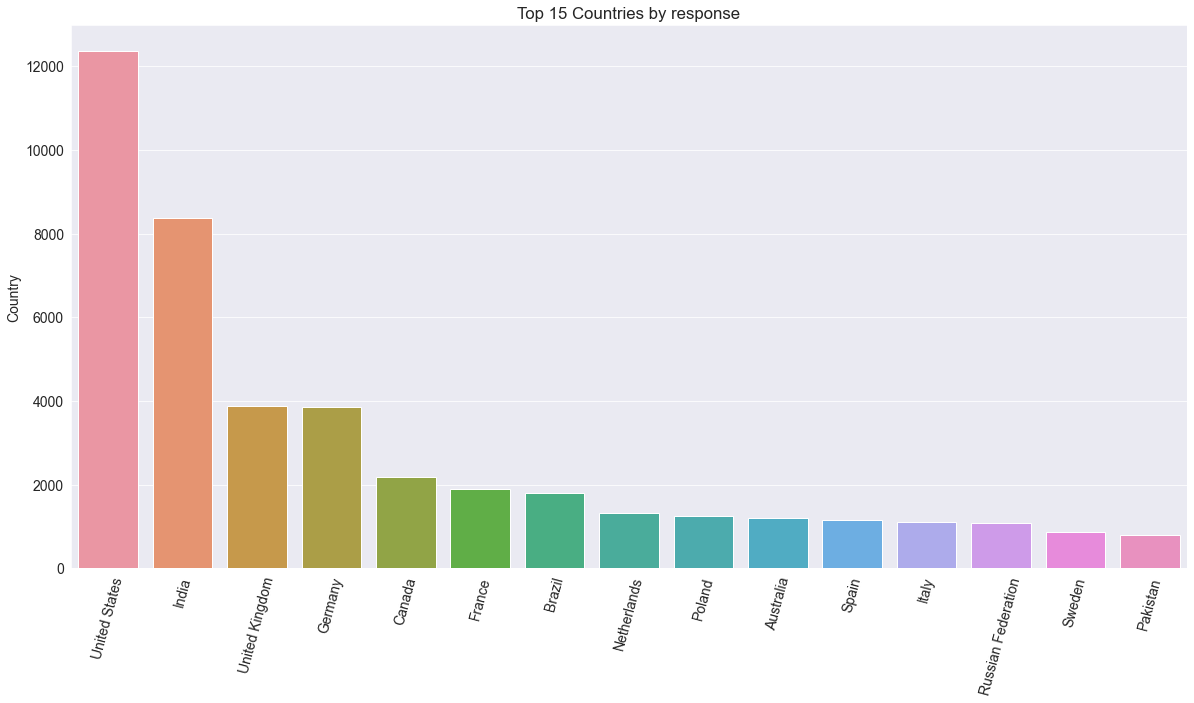

In [24]:
#we can visualize this information using a bar chart.

plt.figure(figsize=(20, 10))
plt.xticks(rotation=75)
plt.title("Top 15 Countries by response")
sns.barplot(x=top_15_countries.index, y=top_15_countries)

It appears that highest number of respondents are from the United States, probably because the survey is in English, and United States have the highest English-speaking population.
We can already see that the survey may not be representative of the global programming community especially from non-English speaking countries.
Programmers from non-English speaking countries are almost certainly underrepresented.

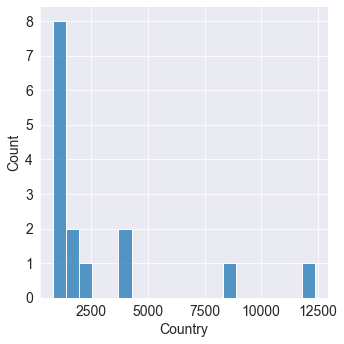

In [25]:
sns.displot(x=top_15_countries, bins=20)

## Age

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

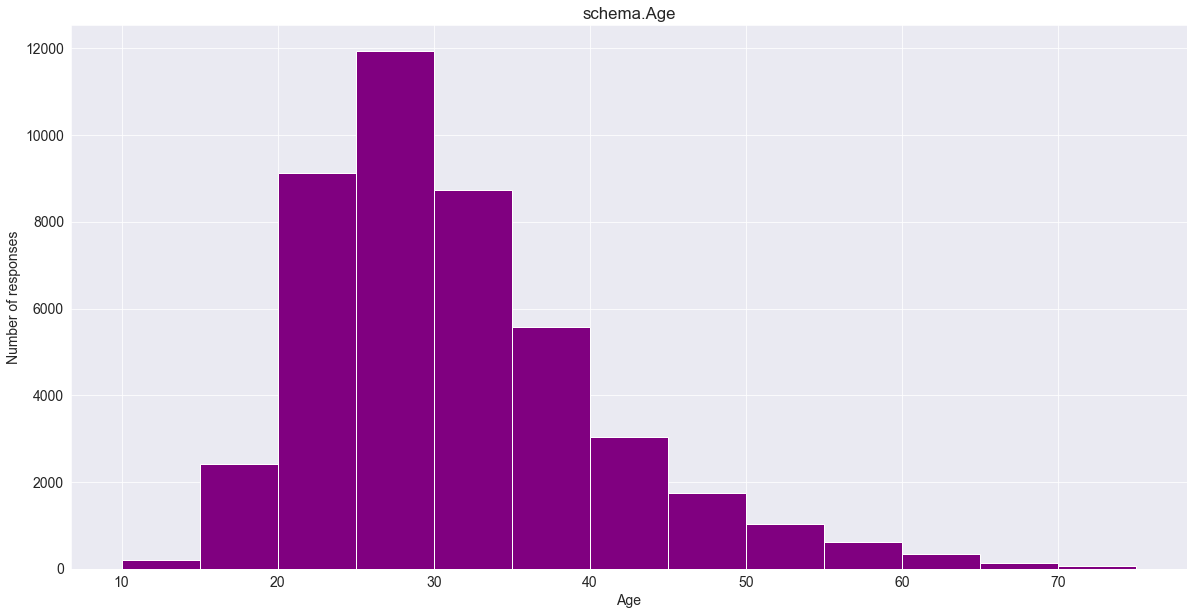

In [26]:
plt.figure(figsize=(20,10))

plt.title("schema.Age")
plt.xlabel("Age")
plt.ylabel("Number of responses")
plt.hist(df.Age, bins=np.arange(10,80,5), color='purple')

It appears that a large percentage of respondents are between 20-45 years old.

## Gender

In [27]:
Gender_counts=df.Gender.value_counts()
Gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

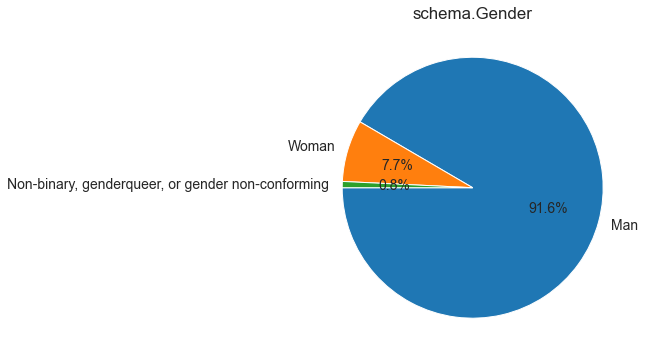

In [28]:
plt.figure(figsize=(12,6))
plt.title("schema.Gender")
plt.pie(Gender_counts, labels=Gender_counts.index, autopct="%1.1f%%", startangle=180);

## Education Level

Text(0, 0.5, '')

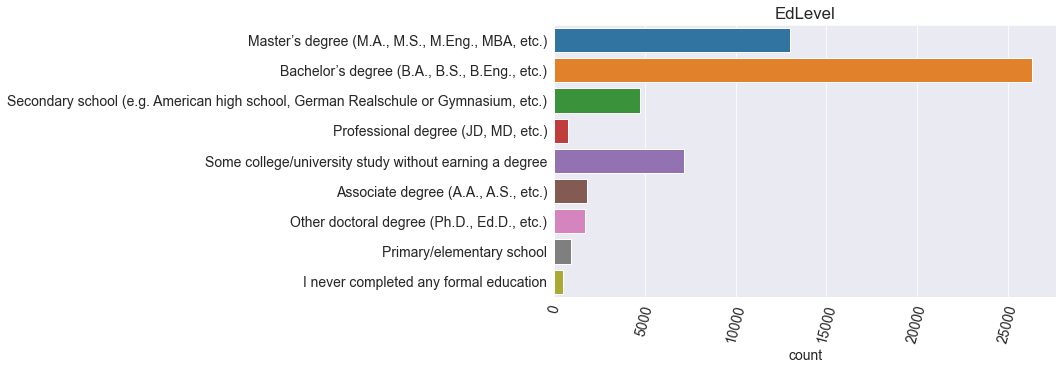

In [29]:
sns.countplot(y=df.EdLevel)
plt.xticks(rotation=75)
plt.title("EdLevel")
plt.ylabel(None)

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education

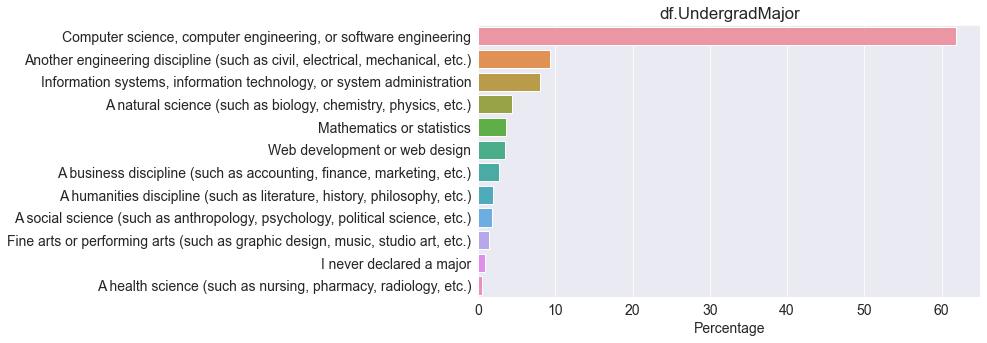

In [30]:
# Primary field of study
df.UndergradMajor
undergrad_pct =df.UndergradMajor.value_counts() * 100 /df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title("df.UndergradMajor")
plt.ylabel(None);
plt.xlabel('Percentage');

### college degree holders vs. Non-college degree holders

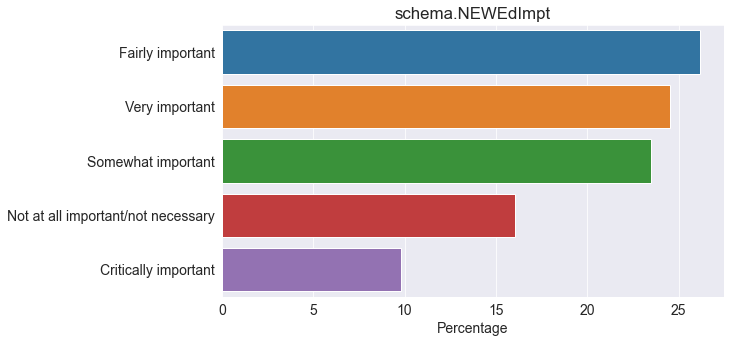

In [32]:
df.NEWEdImpt
undergrad_pct = df.NEWEdImpt.value_counts() * 100 / df.NEWEdImpt.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title("schema.NEWEdImpt")
plt.ylabel(None);
plt.xlabel('Percentage');

## Employment

Text(0.5, 0, 'Percentage')

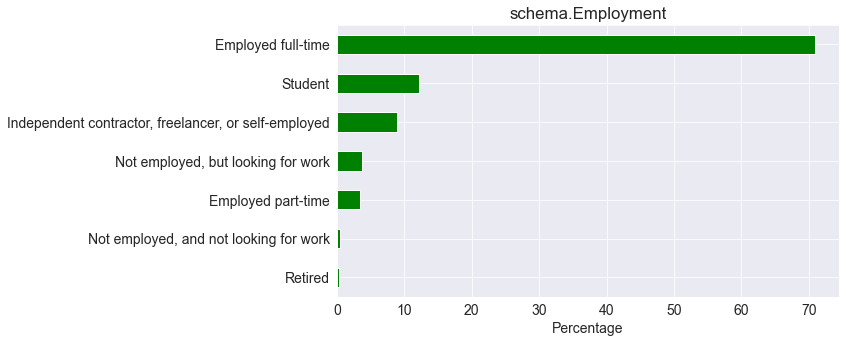

In [41]:
(df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title("schema.Employment")
plt.xlabel("Percentage")

It appears that close to 10% of respondents are either unemployed, employed part time or as freelancers.

In [42]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [45]:
employment_df=split_multicolumn(df.Employment)
employment_df

,"Independent contractor, freelancer, or self-employed",Employed full-time,Student,"Not employed, but looking for work",Employed part-time,Retired,"Not employed, and not looking for work"
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
64456,False,True,False,False,False,False,False
64457,False,True,False,False,False,False,False
64458,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False


Graph shows that Employment ratio in Programming is better

## Roles held by respondents

In [47]:
df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                     4396
Developer, back-end                                                                                                                                                                       3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                            2214
Developer, back-end;Developer, full-stack                                                                                                                                                 1465
Developer, front-end                                                                                                                                                                      1390
                                             

We can split the column values further for making our analysis easy.

In [49]:
dev_type_df = split_multicolumn(df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
dev_type_totals=dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

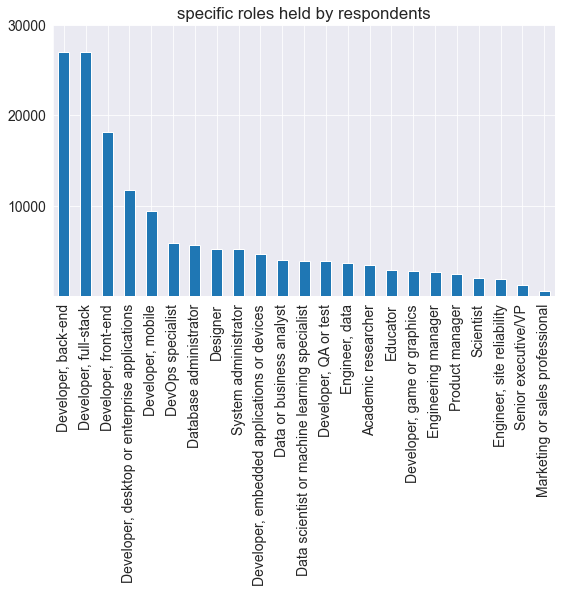

In [52]:
#plotting a barchart
p1=dev_type_totals.plot(kind='bar', title='specific roles held by respondents', yticks=[30000, 20000, 10000])

Above visualization shows that most respondents are front,back and full-stack developers.

## Employed vs Not-Employed programmers

In [55]:
employment_totals=employment_df.sum().sort_values(ascending=False)
employment_totals

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
dtype: int64

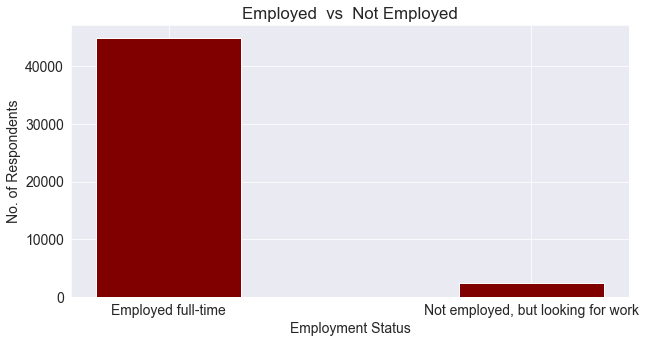

In [56]:
data = {'Employed full-time':44958, 'Not employed, but looking for work':2324 }
Country_name = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(Country_name, values, color ='maroon',width = 0.4)

plt.xlabel("Employment Status")
plt.ylabel("No. of Respondents")
plt.title("Employed  vs  Not Employed")
plt.show()

## United States vs China

In [65]:
g1=df.groupby(['Country']).size().reset_index(name="number of respondents")
g1.head()

,Country,number of respondents
0,Afghanistan,83
1,Albania,53
2,Algeria,94
3,Andorra,13
4,Angola,8


In [66]:
#g1.head(35)
#g1.tail(8)
print(g1.iloc[34])

print(g1.iloc[175])

Country                  China
number of respondents      366
Name: 34, dtype: object
Country                  United States
number of respondents            12371
Name: 175, dtype: object


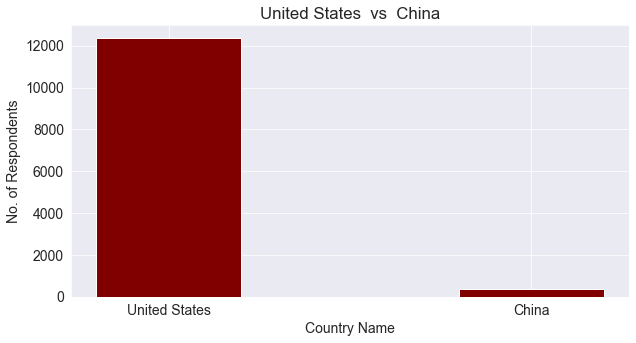

In [67]:
# United States 12371
# China         366
data = {'United States':12371, 'China':366 }
Country_name = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(Country_name, values, color ='maroon',width = 0.4)

plt.xlabel("Country Name")
plt.ylabel("No. of Respondents")
plt.title("United States  vs  China")
plt.show()

Here we noticed that Developers from non-english spoken countries are not participated in this Survey

### What are the most popular programming languages in 2020.?

In [68]:
df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [70]:
languages_worked_df=split_multicolumn(df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,C,TypeScript,Bash/Shell/PowerShell,Kotlin,R,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language

In [72]:
languages_worked_percentages =languages_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

Text(0.5, 0, 'count')

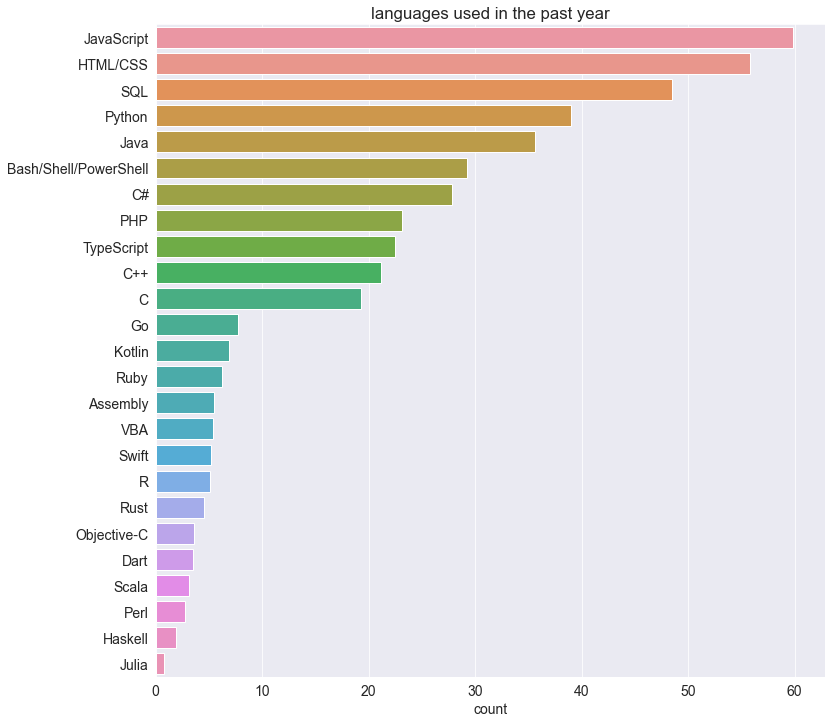

In [78]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("languages used in the past year")
plt.xlabel("count")

Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started.

### Which languages are the most people interested to learn over the next year.?

In [81]:
languages_interested_df=split_multicolumn(df.LanguageDesireNextYear)
languages_interested_percentages=languages_interested_df.mean().sort_values(ascending=False)*100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

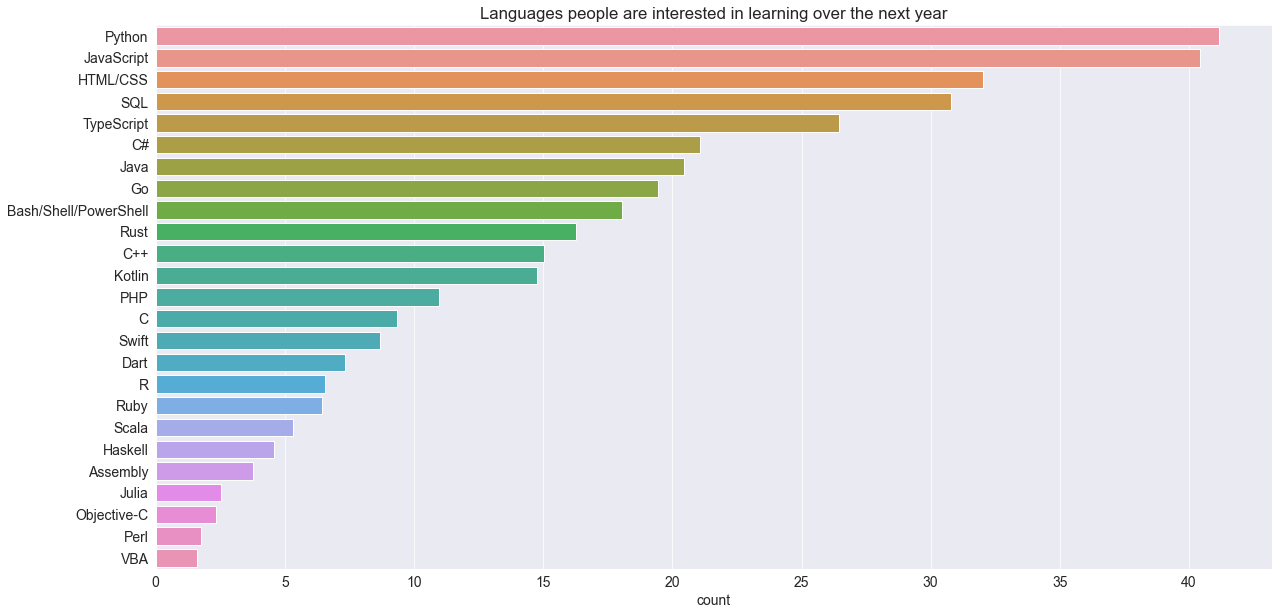

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are interested in learning over the next year");
plt.xlabel("count");

## Which are the most loved languages.?

In [85]:
languages_loved_df=languages_worked_df & languages_interested_df

In [87]:
languages_loved_percentages = languages_loved_df.mean().sort_values(ascending=False)* 100
languages_loved_percentages

JavaScript               34.950082
HTML/CSS                 29.851025
SQL                      27.423569
Python                   25.974248
C#                       16.576991
Java                     15.710820
Bash/Shell/PowerShell    15.698380
TypeScript               15.074799
C++                       9.167107
PHP                       8.611949
C                         6.344665
Go                        4.823811
Kotlin                    4.326190
Rust                      3.872111
Swift                     3.108575
Ruby                      2.662271
R                         2.250179
Dart                      2.183311
Scala                     1.677915
Assembly                  1.584611
VBA                       1.049669
Haskell                   0.956365
Objective-C               0.833515
Perl                      0.782198
Julia                     0.480515
dtype: float64

Text(0.5, 0, 'count')

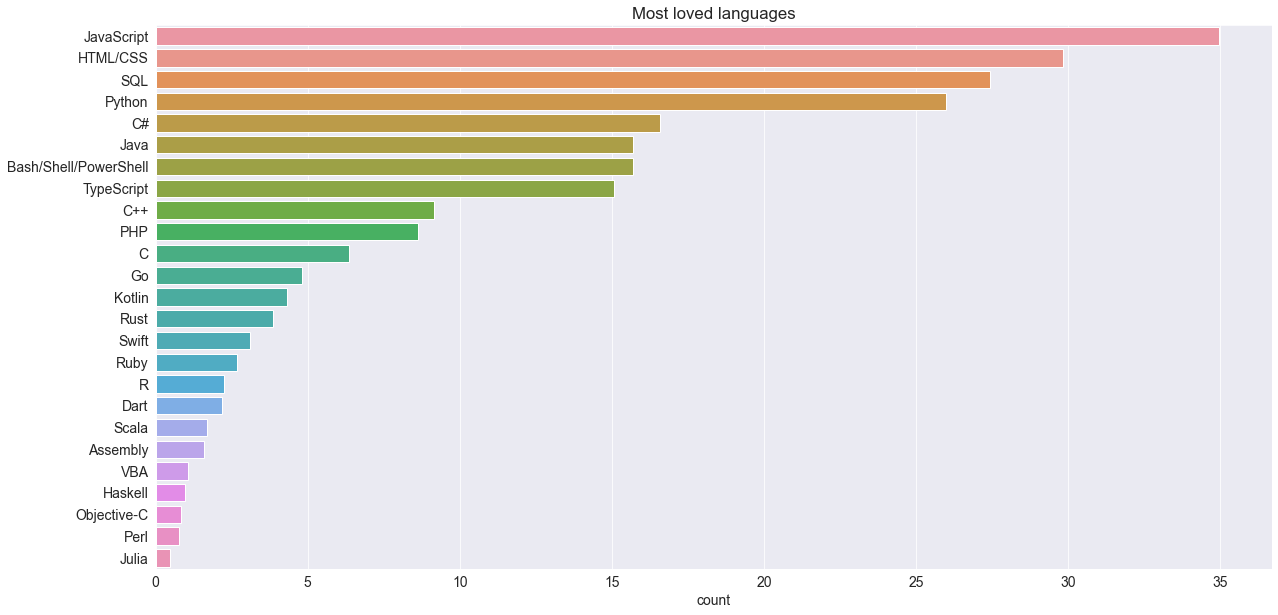

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages")
plt.xlabel("count")

## In which countries do developers work the highest number of hours per week?

In [99]:
countries_df=df.groupby(['Country'])[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
countries_df.head(20)

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
United Republic of Tanzania,46.000000
Jordan,45.806452
Djibouti,45.000000
Tajikistan,45.000000


## How important is it to start young to build a career in programming?

Text(0, 0.5, 'Years of professional coding')

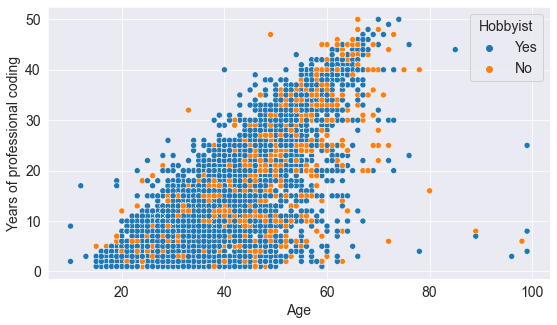

In [97]:
sns.scatterplot(x="Age", y="YearsCodePro", hue="Hobbyist", data=df)
plt.xlabel("Age")
plt.ylabel('Years of professional coding')

You can see points all over the graph, which indicates that you can start programming professionally at any age.¶


Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

## when most of the respondents tried programming for the first time.?

Text(0.5, 1.0, 'Age Most people started coding')

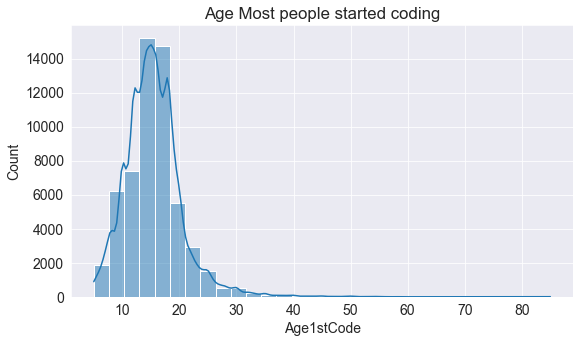

In [101]:
sns.histplot(x=df.Age1stCode, bins=30, kde=True);
plt.title('Age Most people started coding')

Most respondents have some exposure to programming before the age of 40.

## Conclusions

*Based on the survey respondents' demographics, we can say that the survey is not representing the overall programming community because it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.¶

* Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

* A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

* Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

* Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

* Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

* Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

* You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.